# Groupby operations

Some imports:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 10

## Some 'theory': the groupby operation (split-apply-combine)

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [3]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


Using the filtering and reductions operations we have seen in the previous notebooks, we could do something like:


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

But pandas provides the `groupby` method to do this:

In [4]:
df.groupby('key').aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


In [5]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


And many more methods are available. 

## And now applying this on some real data

We go back to the titanic survival data:

In [6]:
df = pd.read_csv("data/titanic.csv")

In [16]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<div class="alert alert-success">
    <b>EXERCISE</b>: Using groupby(), calculate the average age for each sex.
</div>

In [13]:
df.groupby('Sex').mean()[['Age']]

,Age
Sex,
female,27.915709
male,30.726645


<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the average survival ratio for all passengers.
</div>

In [54]:
S = df.groupby('Survived').size()
S / df['Survived'].size

Survived
0    0.616162
1    0.383838
dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).
</div>

In [65]:
Y = df[df['Age'] < 25]
Y2 = Y.groupby('Survived').size()
Y3 = Y['Survived'].size
Y2 / Y3

Survived
0    0.57554
1    0.42446
dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: Is there a difference in this survival ratio between the sexes? (tip: write the above calculation of the survival ratio as a function)
</div>

In [80]:
def SurR(df):
    S = df.groupby('Survived').size()
    A = S / df['Survived'].size
    return  A 

df.groupby('Sex').apply(SurR)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


<div class="alert alert-success">
    <b>EXERCISE</b>: Make a bar plot of the survival ratio for the different classes ('Pclass' column).
</div>

<AxesSubplot:xlabel='Pclass'>

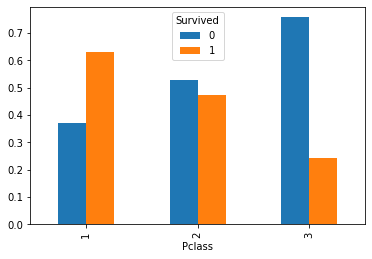

In [90]:
df.groupby('Pclass').apply(SurR).plot(kind='bar')

If you are ready, more groupby exercises can be found in the "Advanded groupby operations" notebook.